In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from statistics import stdev
from scipy.stats import median_abs_deviation, skew, kurtosis
from scipy.stats import norm, logistic, cauchy
from scipy.special import erf
import seaborn as sns; sns.set()
import csv

# MIEDŹ

## Ceny miedzi na przestrzeni 5 lat (Open) (cena za nie wiem jaką ilość)

In [4]:
copper_ = pd.read_csv('copper.csv', sep = ',', encoding = 'latin-1')
copper_

,Date,Close/Last,Volume,Open,High,Low
0,03/28/2023,4.0855,75067,4.0970,4.1130,4.0590
1,03/27/2023,4.0785,65558,4.0750,4.1020,4.0235
2,03/24/2023,4.0750,82229,4.1015,4.1485,4.0505
3,03/23/2023,4.1235,77824,4.0430,4.1265,4.0225
4,03/22/2023,4.0445,77119,4.0015,4.1075,3.9715
...,...,...,...,...,...,...
1254,04/05/2018,3.0745,107499,3.0285,3.0880,3.0135
1255,04/04/2018,3.0105,137745,3.0670,3.0695,2.9700
1256,04/03/2018,3.0635,109250,3.0445,3.0695,3.0385
1257,04/02/2018,3.0500,68976,3.0480,3.0725,3.0370


In [5]:
def equalize(df): #funkcja ta skaluje ceny miedzi do cen za tonę
    d = 2204.623
    col_names = [col for col in df.columns][1:]
    col_names.remove('Volume')
    for name in col_names:
        df[name] = df[name]*d
    return df

In [6]:
copper = equalize(copper_)
copper

,Date,Close/Last,Volume,Open,High,Low
0,03/28/2023,9006.987267,75067,9032.340431,9067.614399,8948.564757
1,03/27/2023,8991.554906,65558,8983.838725,9043.363546,8870.300641
2,03/24/2023,8983.838725,82229,9042.261234,9145.878516,8929.825462
3,03/23/2023,9090.762941,77824,8913.290789,9097.376809,8868.096018
4,03/22/2023,8916.597724,77119,8821.798935,9055.488972,8755.660244
...,...,...,...,...,...,...
1254,04/05/2018,6778.113414,107499,6676.700756,6807.875824,6643.631411
1255,04/04/2018,6637.017542,137745,6761.578741,6767.090299,6547.730310
1256,04/03/2018,6753.862560,109250,6711.974724,6767.090299,6698.746985
1257,04/02/2018,6724.100150,68976,6719.690904,6773.704168,6695.440051


In [7]:
def draw_stock(df, clr):
    fig, ax = plt.subplots(figsize = (15, 4))
    plt.xticks(rotation = 45)
    xloc = plt.MaxNLocator(9)
    ax.xaxis.set_major_locator(xloc)
    dates = df['Date'].values[::-1]
    prices = df['Open'].values[::-1]
    plt.plot(dates, prices, color = clr)
    plt.ylabel('USD')
    plt.show()

## Wykres cen miedzi

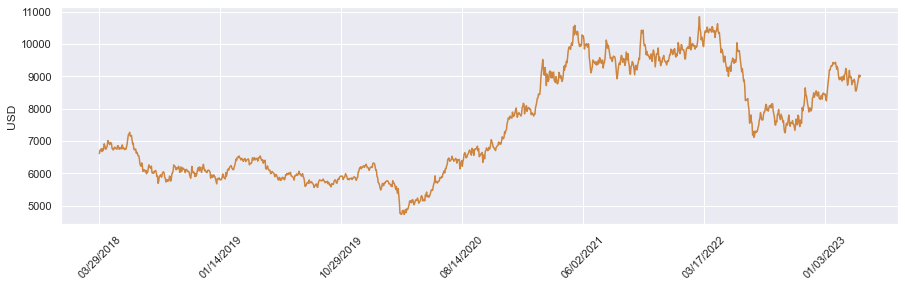

In [8]:
draw_stock(copper, 'peru')

## Histogram logarytmicznych przyrostów

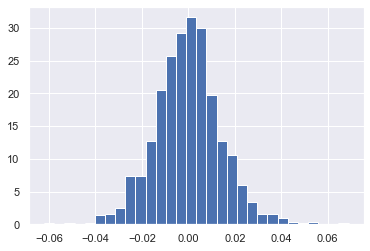

In [9]:
s = np.array(copper['Open'].values[1:])
s2 = np.array(copper['Open'].values[:-1])
r = np.log(s/s2)
plt.hist(r, bins = 30, density = True)
plt.show()

## Miary ryzyka

In [10]:
print('Średnia: ' + str(np.mean(r)))
print('Wariancja: ' + str(np.var(r)))
print('Skośność: ' + str(skew(r)))
print('Kurtoza: ' + str(kurtosis(r)))
print('Odchylenie standardowe: ' + str(stdev(r)))
print('Odchylenie przeciętne: ' + str(median_abs_deviation(r)))
print('Pierwszy kwartyl: ' + str(np.quantile(r, .25)))
print('Mediana: ' + str(np.quantile(r, .5)))
print('Trzeci kwartyl: ' + str(np.quantile(r, .75)))
print('Odchylenie ćwiartkowe: ' + str(0.5*(np.quantile(r, .75) - np.quantile(r, .25))))

Średnia: -0.0002474637775091431
Wariancja: 0.0002036990974127992
Skośność: 0.1732817326149586
Kurtoza: 1.1706203078793909
Odchylenie standardowe: 0.014277995279475236
Odchylenie przeciętne: 0.008389996948843905
Pierwszy kwartyl: -0.009064475215044247
Mediana: -0.00018658173270101624
Trzeci kwartyl: 0.007912980817657341
Odchylenie ćwiartkowe: 0.008488728016350793


In [11]:
mu = np.mean(r)
s = stdev(r)

## Porównanie kwantyli (parametryczne i nieparametryczne) 95%, 97.5% i 99%

In [110]:
#Porównanie histogramu z wykresami funkcji gęstości
def norm_kde(x, mi, sigma):
    x = np.array(sorted(x))
    y = norm.pdf(x, mi, sigma) #rozkład normalny
    y2 = logistic.pdf(x, mi, math.sqrt(3)/math.pi*sigma) #rozkład logistyczny
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1) 
    plt.plot(x, y, color = 'blue', label = 'normal pdf')
    plt.plot(x, y2, color = 'red', label = 'logistic pdf')
    plt.hist(x, bins = 50, density = True, color = 'white', ec = 'black')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

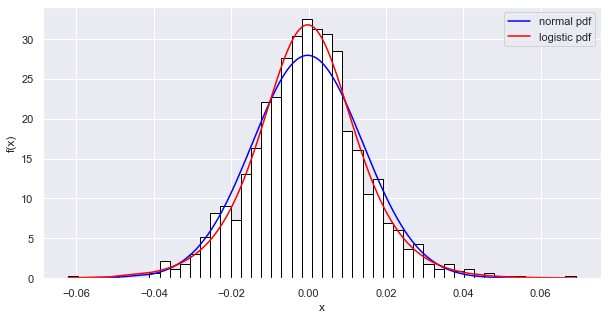

In [111]:
norm_kde(r, mu, s)

In [14]:
def comp_quantile(x, p1, p2, p3): #p ma być z zakresu [0, 1]
    mi = np.mean(x)
    sigma = stdev(x)
    p = [p1, p2, p3]
    real = np.quantile(x, p)
    nrm = norm.ppf(p, mi, sigma)
    lgstc = logistic.ppf(p, mi, math.sqrt(3)/math.pi*sigma)
    perc = [format(p, '.2%') for p in [p1, p2, p3]]
    dct = {'p' : perc, 'real' : real, 'normal' : nrm, 'logistic' : lgstc}
    df = pd.DataFrame(dct)
    return df

In [15]:
comp_quantile(r, .95, .975, .99)

,p,real,normal,logistic
0,95.00%,0.023474,0.023238,0.022931
1,97.50%,0.028719,0.027737,0.028592
2,99.00%,0.037611,0.032968,0.035925


## Wartości dystrybuanty

In [22]:
#Porównanie dystrybuant teoretycznych z dystrybuantą empiryczną
def cdf(x, mi, sigma):
    x = np.array(sorted(x))
    y = norm.cdf(x, mi, sigma)
    y2 = logistic.cdf(x, mi, math.sqrt(3)/math.pi*sigma)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(x, y, color = 'red', label = 'CDF', lw = .7)
    plt.plot(x, y2, color = 'black', label = 'Logistic cdf', linestyle = 'dashdot', lw = .7)
    sns.ecdfplot(data = x, color = 'blue', label = 'ECDF', linestyle = 'dashdot', lw = .7)
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

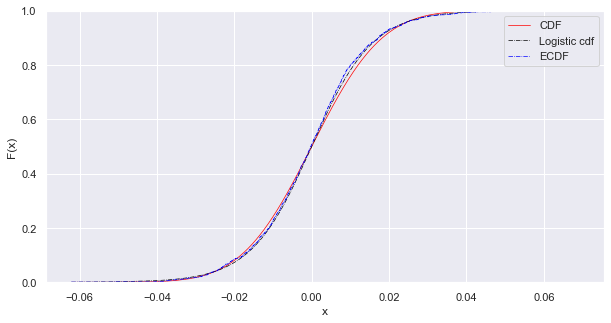

In [23]:
cdf(r, 0, s)

Sprawdzimy wartości dystrybuant dla $x \in \{-0.05, -0.03, -0.01, 0, 0.01, 0.03, 0.05\}$

In [24]:
def comp_dist(x, x0 = [-0.05, -0.03, -0.01, 0, 0.01, 0.03, 0.05]):
    x = sorted(x)
    mi = np.mean(x)
    sigma = stdev(x)
#     real = [np.linspace(0, 1, len(x))]
    nrm = norm.cdf(x0, mi, sigma)
    lgstc = logistic.cdf(x0, mi, sigma)
    dct = {'x0' : x0, 'normal' : nrm, 'logistic' : lgstc}
    df = pd.DataFrame(dct)
    return df

In [25]:
comp_dist(r)

,x0,normal,logistic
0,-0.05,0.000246,0.029755
1,-0.03,0.018589,0.110681
2,-0.01,0.247289,0.335582
3,0.00,0.506914,0.504333
4,0.01,0.763532,0.672103
5,0.03,0.982932,0.892685
6,0.05,0.999784,0.971230


## Miary wrażliwości

# ALUMINIUM (jeszcze do uzgodnienia)

## Ceny aluminium (Open) (w USD za tonę)

In [48]:
aluminium = pd.read_csv('aluminium.csv', sep = ',', encoding = 'latin-1')
aluminium

,Date,Close/Last,Volume,Open,High,Low
0,04/12/2023,2328.50,1205.0,2311.00,2335.0,2293.50
1,04/11/2023,2306.75,1979.0,2333.75,2335.5,2302.50
2,04/10/2023,2348.00,2215.0,2348.00,2348.0,2348.00
3,04/06/2023,2338.25,1373.0,2355.00,2359.5,2329.25
4,04/05/2023,2370.00,NaN,2370.00,2370.0,2370.00
...,...,...,...,...,...,...
1254,04/19/2018,2300.00,NaN,2300.00,2300.0,2300.00
1255,04/18/2018,2300.00,NaN,2300.00,2300.0,2300.00
1256,04/17/2018,2300.00,NaN,2300.00,2300.0,2300.00
1257,04/16/2018,2300.00,NaN,2300.00,2300.0,2300.00


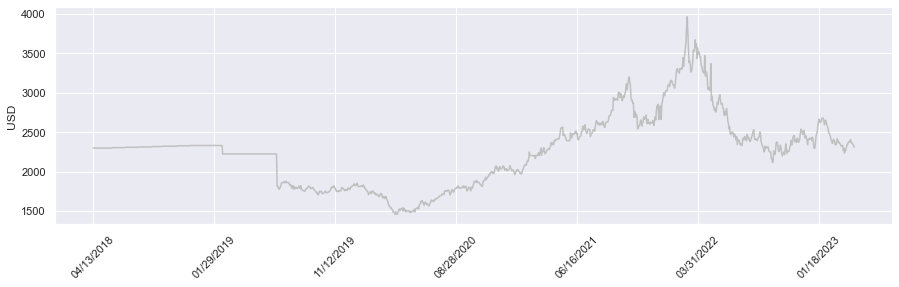

In [49]:
draw_stock(aluminium, 'silver')

In [50]:
idx = aluminium.index[aluminium['Date'] == '07/01/2019'].tolist()[0]
idx

952

In [51]:
aluminium2 = aluminium.drop(aluminium.index[idx:1259])

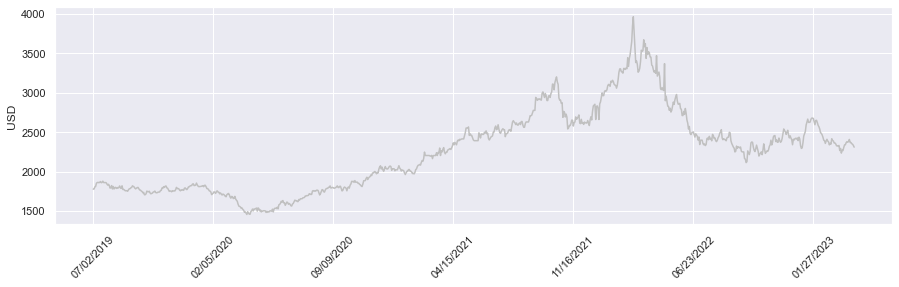

In [52]:
draw_stock(aluminium2, 'silver')

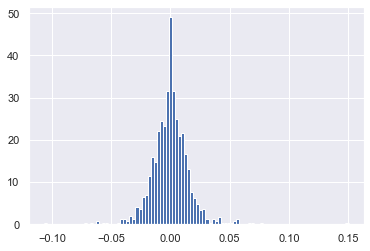

In [118]:
#logarytmiczne stopy zwrotu
s_ = np.array(aluminium2['Open'].values[1:])
s2_ = np.array(aluminium2['Open'].values[:-1])
r2 =  np.log(s_/s2_)
plt.hist(r2, bins = 100, density = True)
plt.show()

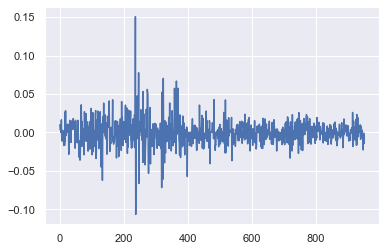

In [54]:
plt.plot([*range(len(r2))], r2)
plt.show()

In [55]:
mu2 = np.mean(r2)
s2 = stdev(r2)
print('Średnia: ' + str(mu2))
print('Odchylenie standardowe: ' + str(s2))

Średnia: -0.0002754048568726295
Odchylenie standardowe: 0.016525948225364212


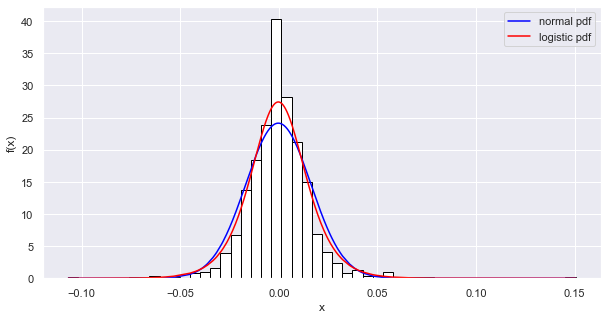

In [112]:
norm_kde(r2, mu2, s2)

In [57]:
comp_quantile(r2, .95, .975, .99)

,p,real,normal,logistic
0,95.00%,0.023344,0.026907,0.026552
1,97.50%,0.031319,0.032115,0.033104
2,99.00%,0.050773,0.038170,0.041592


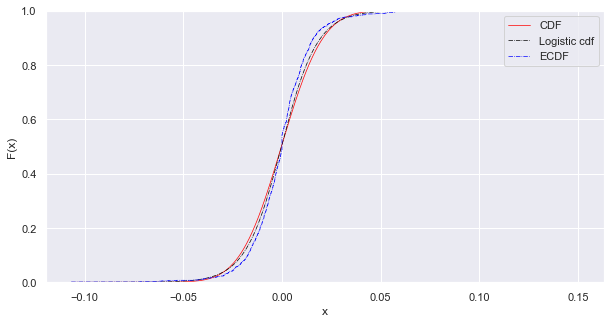

In [58]:
cdf(r2, mu2, s2)

In [59]:
comp_dist(r)

,x0,normal,logistic
0,-0.05,0.000246,0.029755
1,-0.03,0.018589,0.110681
2,-0.01,0.247289,0.335582
3,0.00,0.506914,0.504333
4,0.01,0.763532,0.672103
5,0.03,0.982932,0.892685
6,0.05,0.999784,0.971230


# PRZYPADEK WIELOWYMIAROWY